In [2]:
import os
from huggingface_hub import login, whoami

In [54]:
user = 'tnn1t1s'
uid = whoami(token=os.environ.get('HF_TOKEN'))

## Developing, hosting and building UI for custom pytorch models

Reference:
    - https://huggingface.co/docs/huggingface_hub/v0.20.3/en/package_reference/mixins#huggingface_hub.PyTorchModelHubMixin

In [10]:
import torch
import torch.nn as nn
from huggingface_hub import PyTorchModelHubMixin

### write a simple model

In [56]:
import torch
import torch.nn as nn

class StraightLineModel(nn.Module, PyTorchModelHubMixin):
    def __init__(self):
        super(StraightLineModel, self).__init__()
        # Define a linear layer with 1 input and 1 output, and no bias
        self.linear = nn.Linear(1, 1, bias=False)

    def forward(self, x):
        # Forward pass through the linear layer
        return self.linear(x)

# Create an instance of the model
model = StraightLineModel()

# Optionally, you can initialize the weight to a specific slope 'm'
with torch.no_grad():
    model.linear.weight.fill_(2)  # Replace 'm' with your desired slope


### try the model

In [57]:

x_values = torch.tensor([5], dtype=torch.float32)
y_values = model.forward(x_values)

(x_values, y_values)


(tensor([5.]), tensor([10.], grad_fn=<SqueezeBackward4>))

### push the model to hub

In [58]:
model_name = 'lines'
model.save_pretrained(model_name)

# Push model weights to the Hub
model.push_to_hub(model_name)


pytorch_model.bin:   0%|          | 0.00/893 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/893 [00:00<?, ?B/s]

### use the model from the hub

In [59]:
hub_model = StraightLineModel.from_pretrained(f"{user}/{model_name}")

In [61]:
hub_model.forward(torch.tensor([5], dtype=torch.float32))

tensor([10.], grad_fn=<SqueezeBackward4>)

### draw a a line using the model

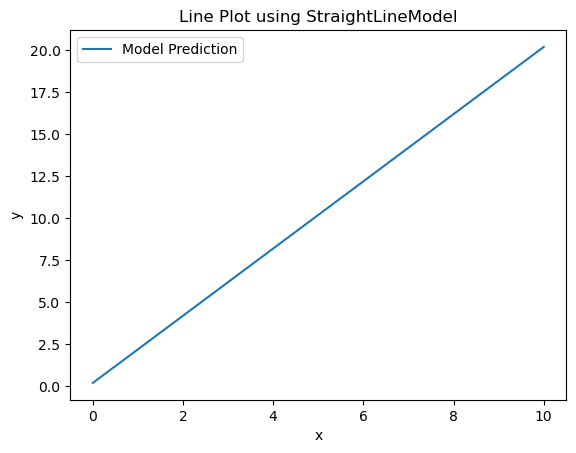

In [64]:
import matplotlib.pyplot as plt
%matplotlib inline


def plot_line(model, start, end, steps=100):
    # Generate a range of x values from start to end
    x_values = torch.linspace(start, end, steps).view(-1, 1)

    # Use the model to predict y values
    with torch.no_grad():  # We don't need to track gradients here
        y_values = model(x_values)

    # Convert tensors to numpy arrays for plotting
    x_values = x_values.numpy()
    y_values = y_values.numpy()

    # Plotting
    plt.plot(x_values, y_values, label='Model Prediction')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Line Plot using StraightLineModel')
    plt.legend()
    plt.show()

# Plot the line from 0 to 10
plot_line(model, 0, 10)
